In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### using cleaned data

In [2]:
AnimesDF = pd.read_csv('myanimelist/anime_cleaned.csv')
AnimesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
anime_id           6668 non-null int64
title              6668 non-null object
title_english      3438 non-null object
title_japanese     6663 non-null object
title_synonyms     4481 non-null object
image_url          6666 non-null object
type               6668 non-null object
source             6668 non-null object
episodes           6668 non-null int64
status             6668 non-null object
airing             6668 non-null bool
aired_string       6668 non-null object
aired              6668 non-null object
duration           6668 non-null object
rating             6668 non-null object
score              6668 non-null float64
scored_by          6668 non-null int64
rank               6312 non-null float64
popularity         6668 non-null int64
members            6668 non-null int64
favorites          6668 non-null int64
background         813 non-null object
premiered          2

In [3]:
UsersDF = pd.read_csv('myanimelist/users_cleaned.csv')
UsersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
username                    108710 non-null object
user_id                     108711 non-null int64
user_watching               108711 non-null int64
user_completed              108711 non-null int64
user_onhold                 108711 non-null int64
user_dropped                108711 non-null int64
user_plantowatch            108711 non-null int64
user_days_spent_watching    108711 non-null float64
gender                      108711 non-null object
location                    108706 non-null object
birth_date                  108711 non-null object
access_rank                 0 non-null float64
join_date                   108711 non-null object
last_online                 108711 non-null object
stats_mean_score            108711 non-null float64
stats_rewatched             108711 non-null float64
stats_episodes              108711 non-null int64
dtypes: float64(4), int64(7), 

In [4]:
ScoresDF = pd.read_csv('myanimelist/animelists_cleaned.csv')
ScoresDF.info()
#only take the columns that are important for the recommendation system
ScoresDF = ScoresDF[['username', 'anime_id', 'my_score', 'my_status']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
username               object
anime_id               int64
my_watched_episodes    int64
my_start_date          object
my_finish_date         object
my_score               int64
my_status              int64
my_rewatching          float64
my_rewatching_ep       int64
my_last_updated        object
my_tags                object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [46]:
# Counting how many relevant scores each user have done, resetting the index (so the series could become a DF again) and changing the column names
UsersAndScores = ScoresDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})
print(UsersAndScores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108709 entries, 0 to 108708
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ MB
None


### Threshold for animes_rated
when animes_rates >= 28 -> we lose 10% of the data


Users who rated 28+ animes:

       username  animes_rated
0        Exxorn          6536
1       uemmega          6367
2    JakCooper2          5923
3  DeadlyKizuna          5912
4   KanaenuYume          5234
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97960 entries, 0 to 97959
Data columns (total 2 columns):
username        97960 non-null object
animes_rated    97960 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ MB
None
       animes_rated
count  97960.000000
mean     317.918763
std      316.730077
min       28.000000
25%      113.000000
50%      225.000000
75%      414.000000
max     6536.000000


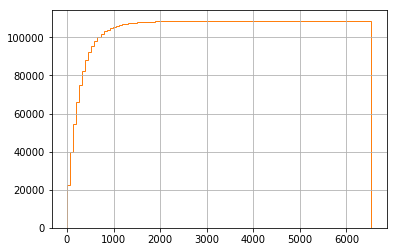

In [51]:
UsersAndScores['animes_rated'].hist( cumulative = True, histtype='step', bins=100, color='tab:orange')
UsersAndScores['animes_rated'].quantile(0.1) # 10th percentile = 28
UsersWith214plusRatings=UsersAndScores.loc[UsersAndScores['animes_rated'] >= 28]
print("\nUsers who rated 28+ animes:\n")
print(UsersWith28plusRatings.head())
print(UsersWith28plusRatings.info())
print(UsersWith28plusRatings.describe())

**how to determine weight based on distribution of animes_rated**?

## OLD EXPLORATION CODE SNIPPETS

In [34]:
UsersAndScores.sort_values(by=['animes_rated'], inplace=True)
print(UsersAndScores.info())
print(UsersAndScores['animes_rated'].mean()) # 287.7755015684074
animes_rated_user_count=UsersAndScores.groupby('animes_rated').size().reset_index(name='no of users who made this many ratings')
print("\nNo of users grouped by no of animes rate:\n")
print(animes_rated_user_count.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108709 entries, 108708 to 0
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None
287.7755015684074

No of users grouped by no of animes rate:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
animes_rated                              2140 non-null int64
no of users who made this many ratings    2140 non-null int64
dtypes: int64(2)
memory usage: 33.5 KB
None


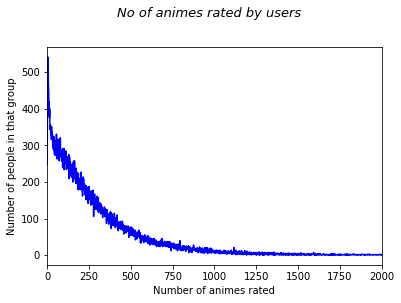

In [53]:
plt.suptitle("No of animes rated by users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'no of users who made this many ratings', data = animes_rated_user_count, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

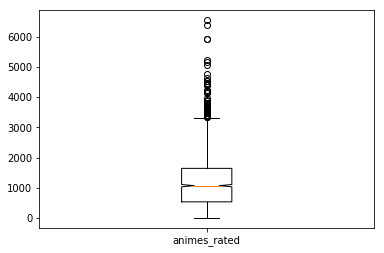

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([animes_rated_user_count['animes_rated']], notch = True, labels=['animes_rated']);
# median is about 1000
# many outliers 

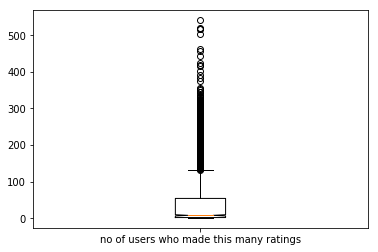

In [23]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.boxplot([animes_rated_user_count['no of users who made this many ratings']], notch = True, labels=['no of users who made this many ratings']);

In [9]:
# merge user info and usersAndScore(no of animes they rated) tables
UserInfoAndScores = pd.merge(UsersAndScores, UsersDF, left_on = 'username', right_on = 'username', how = 'inner')

In [10]:
UserInfoAndScores.head()

,username,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,kit_kat,1,253267,0,1,0,0,0,0.766667,Female,on my but ^-^,1997-04-27 00:00:00,NaN,2009-10-31 00:00:00,2009-10-31 17:28:00,9.0,3.0,46
1,JMc_SetoKai_LoVe,1,263803,0,1,0,0,0,0.722222,Female,Guatemala,1993-05-29 00:00:00,NaN,2009-11-28 00:00:00,2009-12-22 21:45:00,9.0,3.0,52
2,Shirayuki_14,1,402534,1,0,0,0,0,2.950000,Female,"North Hollywood, California",1992-06-13 00:00:00,NaN,2010-10-31 00:00:00,2010-10-31 13:28:00,10.0,0.0,177
3,taijinru,1,10546,1,0,0,0,0,1.366667,Male,tobyhanna,1989-09-02 00:00:00,NaN,2007-08-17 00:00:00,2007-08-17 20:06:00,9.0,0.0,82
4,carlmike2007,1,118309,0,1,0,0,0,0.590972,Male,"Cochin, India",1986-02-08 00:00:00,NaN,2008-11-28 00:00:00,2014-10-12 12:10:00,10.0,0.0,37


In [11]:
#Counting how many relevant scores each anime has, resetting the index (so the series could become a DF again) and changing the column names
RatedsPerAnime = ScoresDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
RatedsPerAnime.head()

,anime_id,number_of_users
0,1535,81332
1,1575,67721
2,226,64486
3,5114,63649
4,4224,63278


In [12]:
#Grouping users whom had the same amount of animes rated
AnimeRatedsAggregated = RatedsPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "no_of_anime_rated", "index": "number_of_users"}).sort_values(by=['number_of_users'])
AnimeRatedsAggregated.head()

,number_of_users,no_of_anime_rated
443,1,3
24,2,11
26,3,11
21,4,12
6,5,16


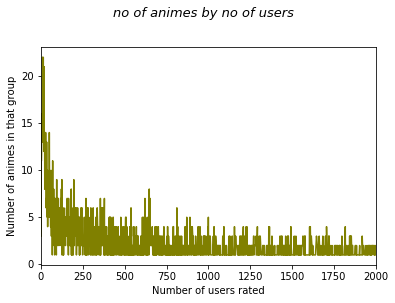

In [54]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("no of animes by no of users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'no_of_anime_rated', data = AnimeRatedsAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()